In [1]:
# only adjust settings in this cell
state = 'IA'
k = 4                 # the state has this number of districts
enumeration_limit = 10

In [2]:
filepath = 'C:\\districting-data-2020-reprojection\\'
filename = state + '_county.json'

from read import read_graph_from_json
G = read_graph_from_json( state, filepath + filename) 
k = G._k

In [3]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / k
print(f"When k = {k}, ideal_population = {round(ideal_population,2)}.")

When k = 4, ideal_population = 797592.25.


In [4]:
from optimization import iterative_refinement
from math import ceil, floor
import time

deviation = 1/2
max_deviation = 0.01 * ideal_population
plans = list()

while True:

    print("*****************************************")
    print(f"Trying deviation = {deviation}.")
    print("*****************************************")
    
    L = ceil( ideal_population - deviation )
    U = floor( ideal_population + deviation )

    start_time = time.perf_counter()
    plans += iterative_refinement(G, L, U, k, enumeration_limit=enumeration_limit, verbose=False)
    print("Total time =",round(time.perf_counter() - start_time,2))

    if deviation == max_deviation:
        break
    
    deviation *= 2
    deviation = min( deviation, max_deviation )
       

*****************************************
Trying deviation = 0.5.
*****************************************
Set parameter Username
Academic license - for non-commercial use only - expires 2026-04-01
Total time = 0.03
*****************************************
Trying deviation = 1.0.
*****************************************
Total time = 25790.43
*****************************************
Trying deviation = 2.0.
*****************************************
Total time = 36146.18
*****************************************
Trying deviation = 4.0.
*****************************************
Total time = 43293.38
*****************************************
Trying deviation = 8.0.
*****************************************
Total time = 34790.02
*****************************************
Trying deviation = 16.0.
*****************************************
Total time = 24231.0
*****************************************
Trying deviation = 32.0.
*****************************************
Total time = 14815.27
**

***************************************
obj_type = cut_edges
***************************************
Pareto front objective values: [[0.75, 122], [1.75, 112], [3.75, 110], [4.25, 106], [5.75, 104], [6.75, 100], [7.25, 96], [13.25, 92], [23.75, 90], [35.75, 86], [62.75, 80], [125.25, 78], [271.75, 76], [462.25, 74], [475.75, 72], [546.25, 70], [663.25, 66], [4089.75, 64]]


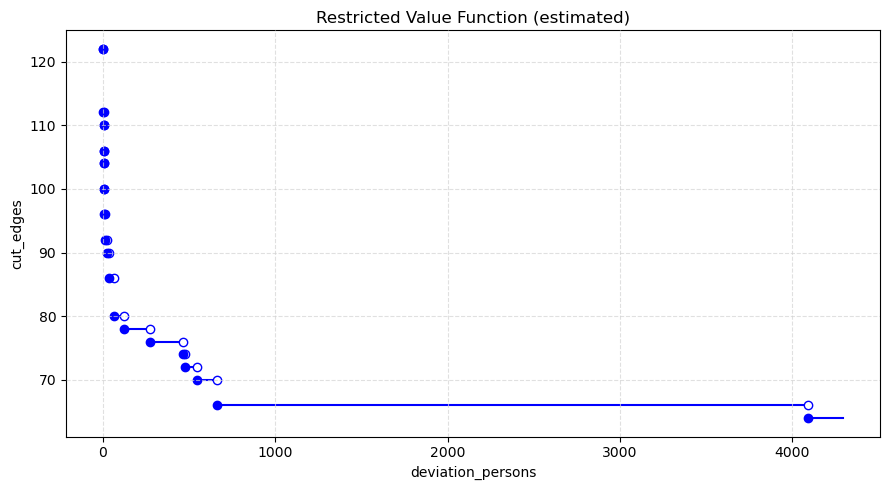

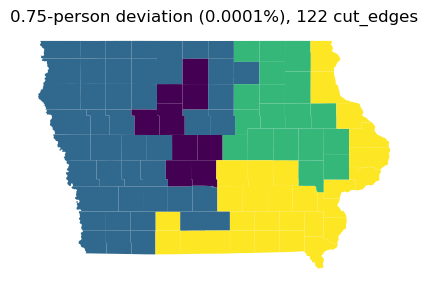

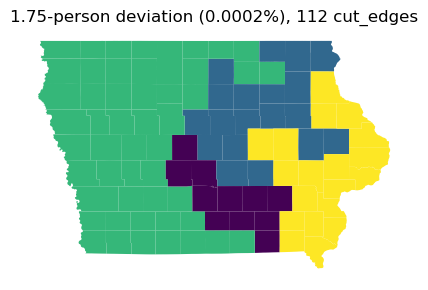

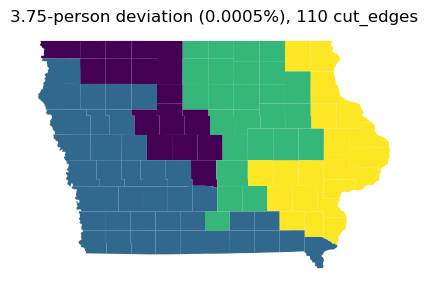

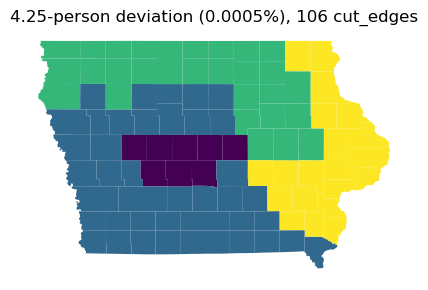

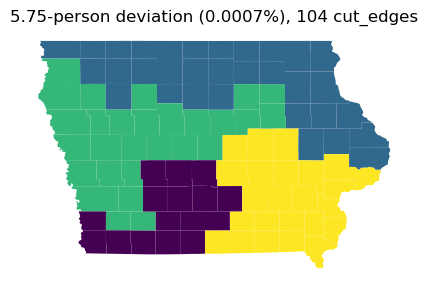

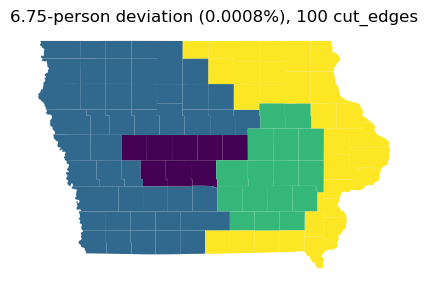

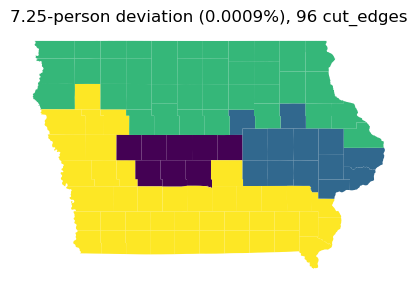

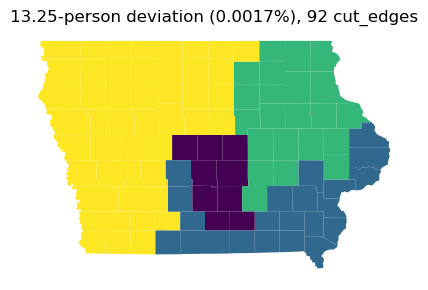

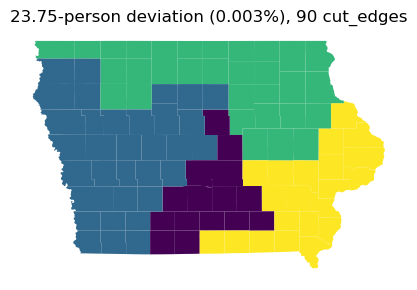

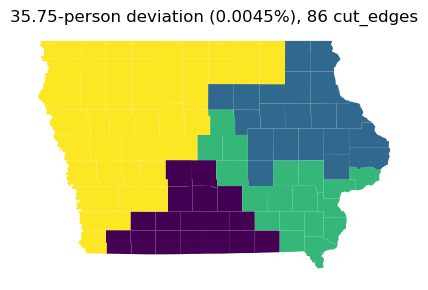

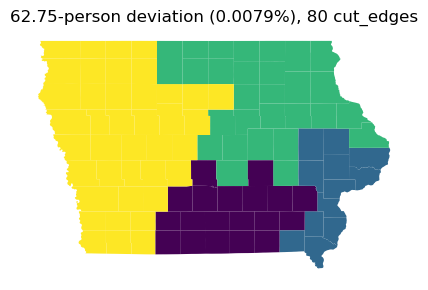

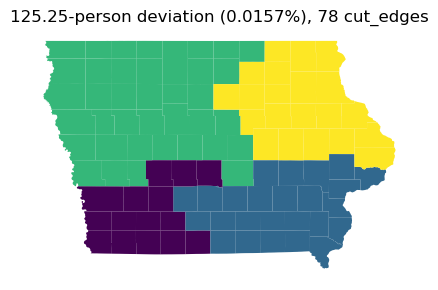

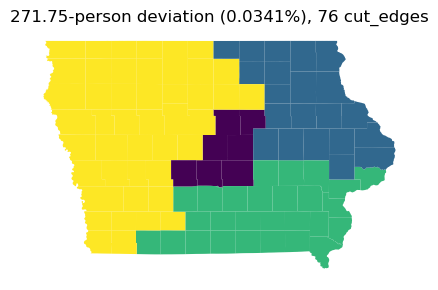

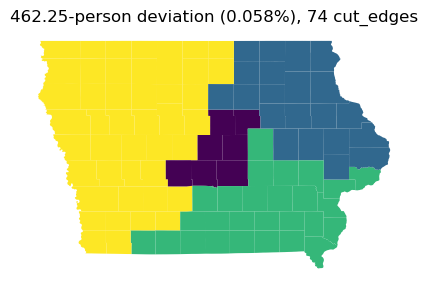

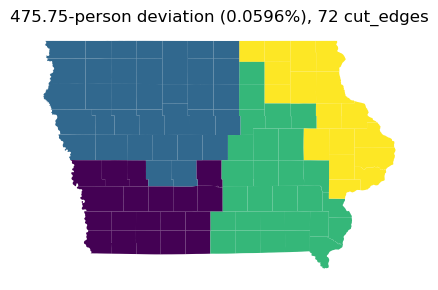

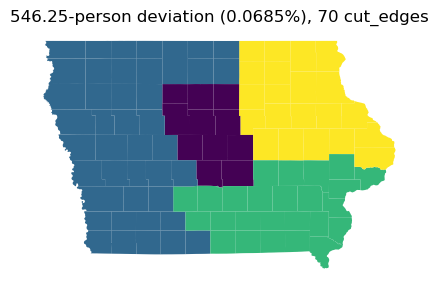

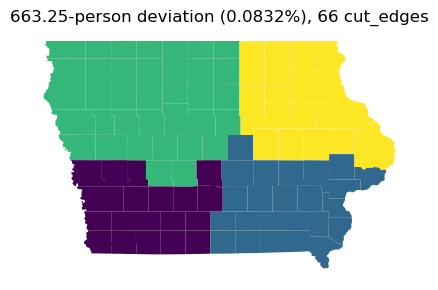

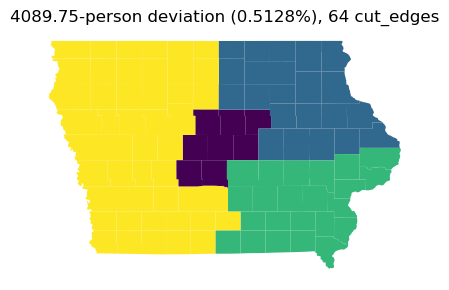

***************************************
obj_type = perimeter
***************************************
Pareto front objective values: [[0.75, 55.79971669220659], [1.25, 54.43241747951764], [1.75, 52.5028803322928], [2.25, 51.01408760702344], [3.75, 50.26089766341764], [5.75, 50.09853553585805], [6.75, 47.64304932668701], [7.25, 47.32016388351121], [10.25, 46.306349103454096], [13.25, 45.49375312944857], [52.75, 44.818324414700264], [62.75, 44.61308555837982], [71.75, 44.32330362681218], [85.25, 43.02215228538631], [107.75, 42.8828964254494], [190.25, 42.21401617396215], [273.75, 41.823567224666455], [281.75, 41.676530165730675], [438.25, 41.3910671980123], [475.75, 40.6667716772617], [630.25, 40.65369162672028], [663.25, 38.90543801945935], [1747.75, 38.47020645571146], [2015.25, 38.318795375905694], [2979.75, 37.89788177346437], [5877.25, 37.597604361466246]]


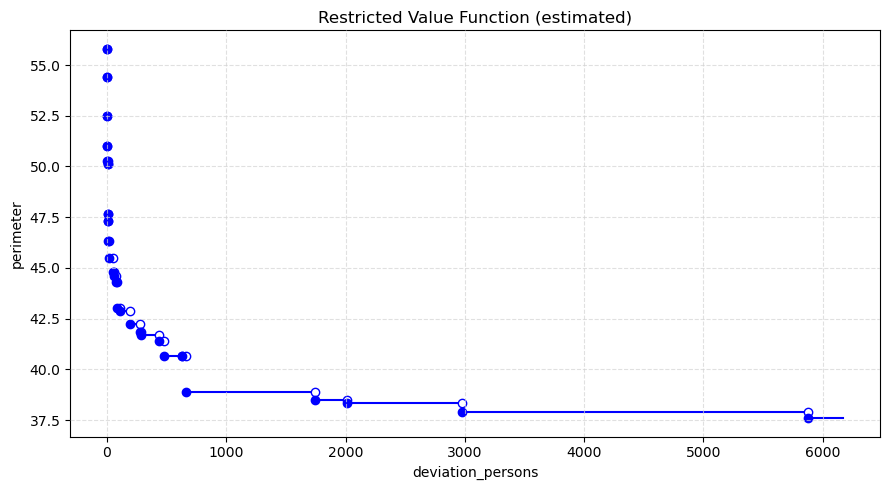

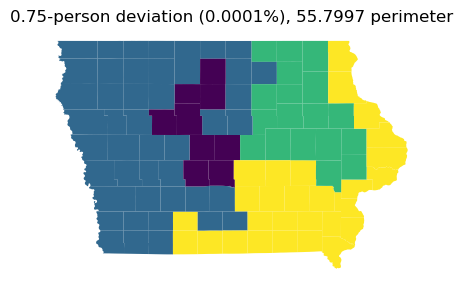

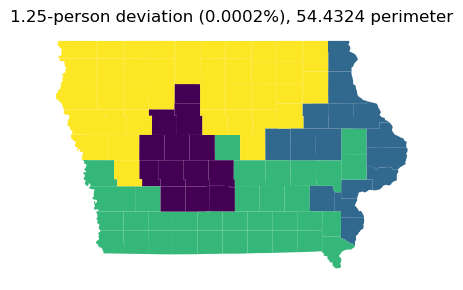

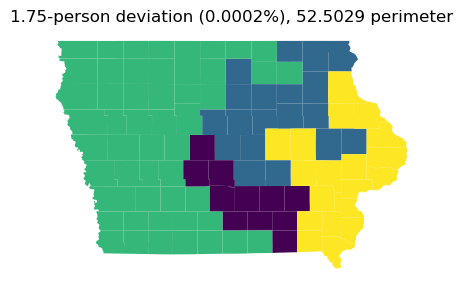

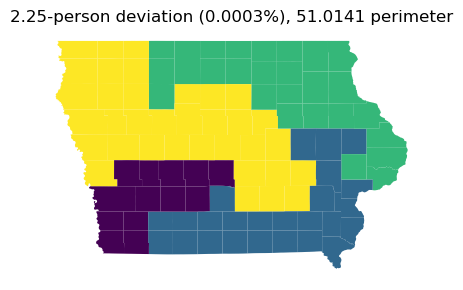

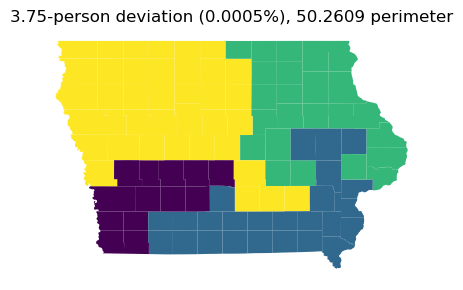

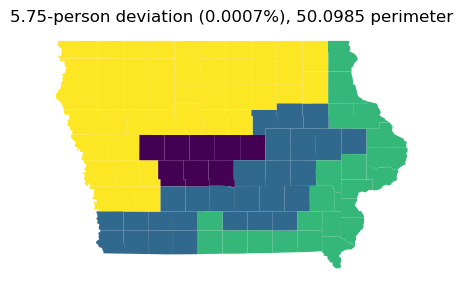

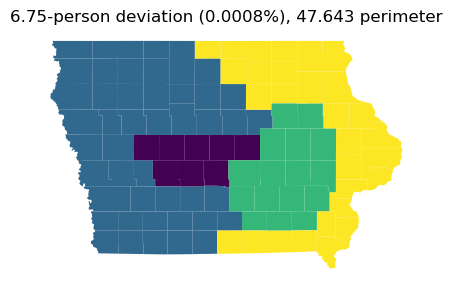

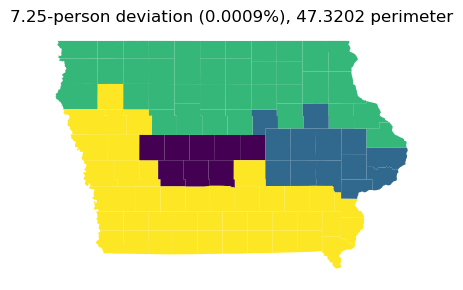

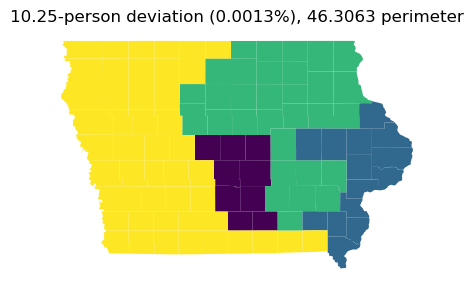

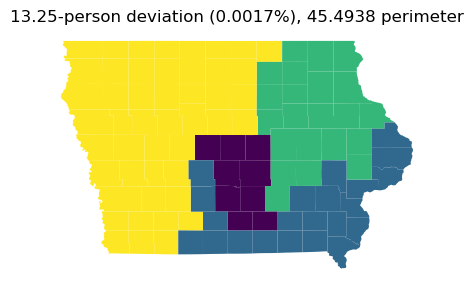

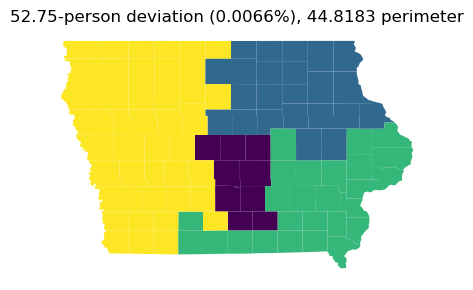

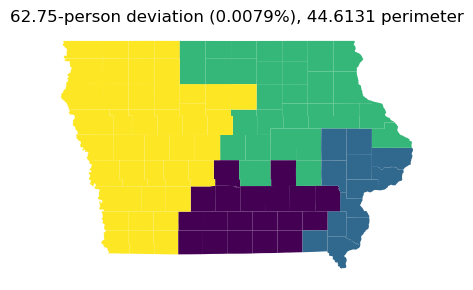

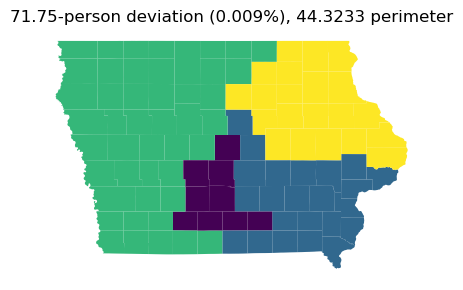

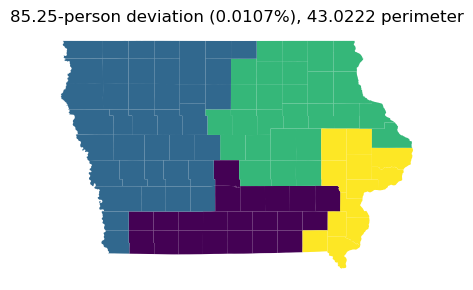

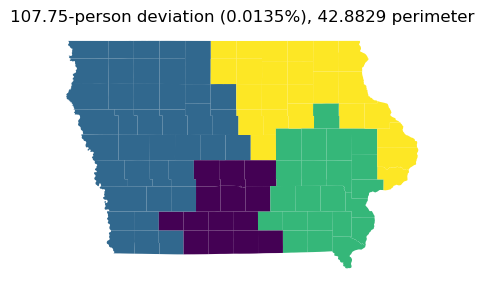

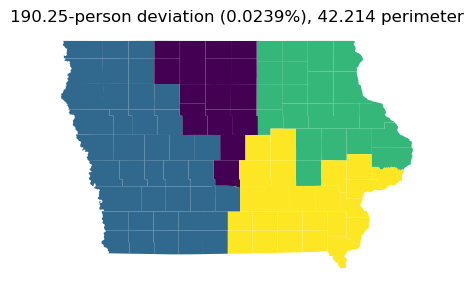

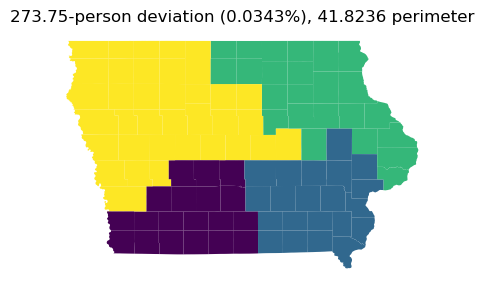

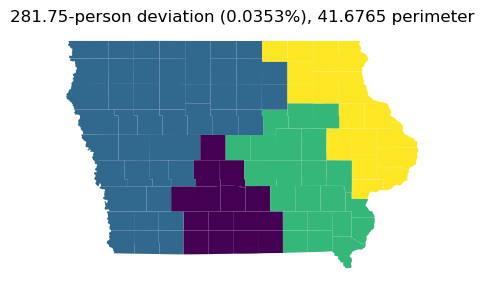

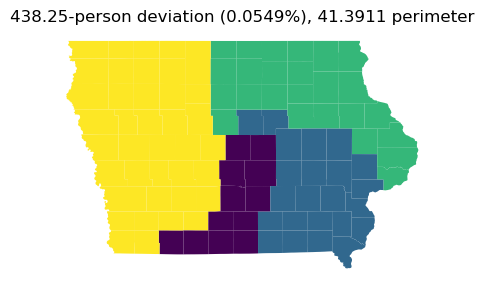

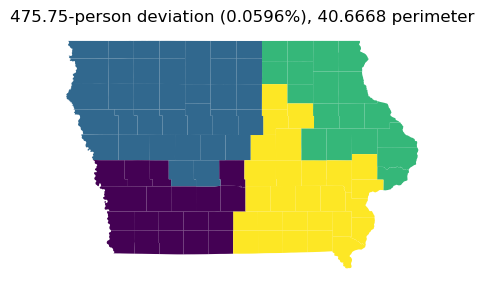

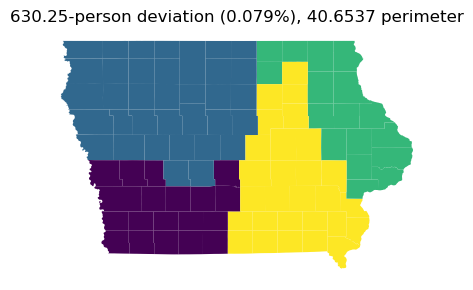

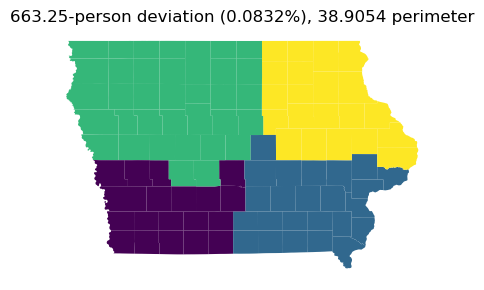

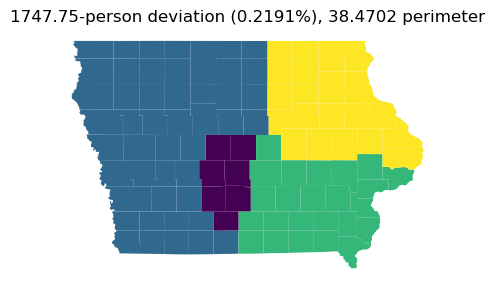

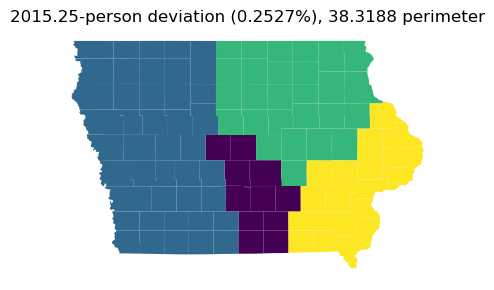

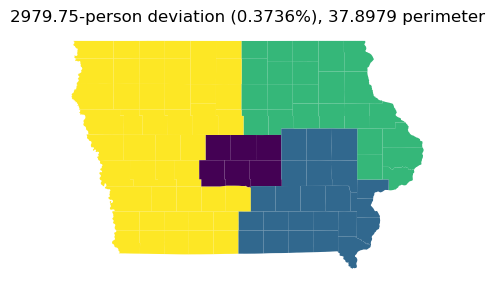

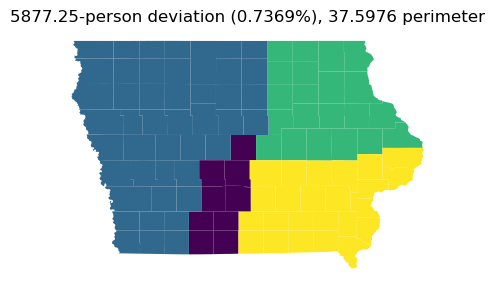

***************************************
obj_type = inverse_Polsby_Popper
***************************************
Pareto front objective values: [[0.75, 4.4142739592436655], [1.25, 4.306339124798565], [1.75, 4.063837317336417], [2.25, 3.629942247037561], [3.75, 3.5692133846700735], [6.75, 3.2581039532392593], [7.25, 3.145533729421383], [10.25, 3.106651776567625], [13.25, 3.105994695539584], [13.75, 2.975792782475164], [51.75, 2.902806419776352], [52.75, 2.850544269517818], [85.25, 2.7018914228148345], [107.75, 2.591923727497646], [190.25, 2.4973582540635983], [273.75, 2.412244290005118], [387.75, 2.412192575904722], [475.75, 2.333964131115916], [663.25, 2.124594643540135], [2979.75, 2.056994108591336], [5877.25, 2.0294556971267004]]


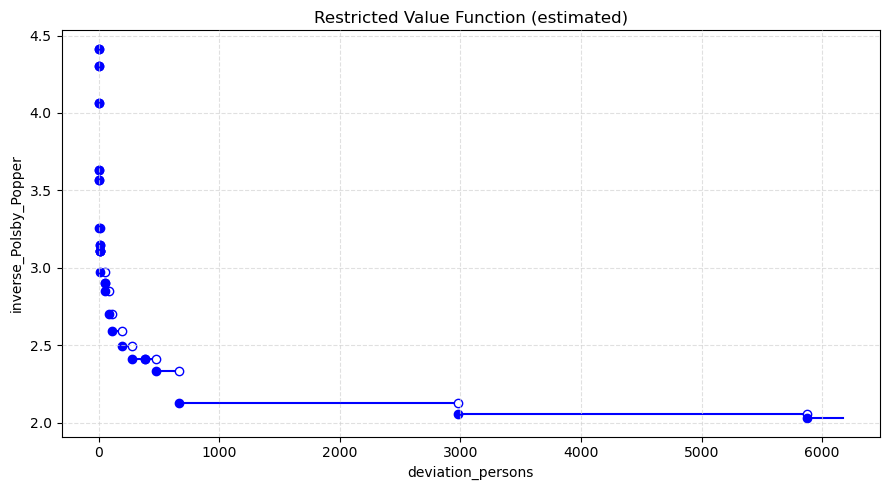

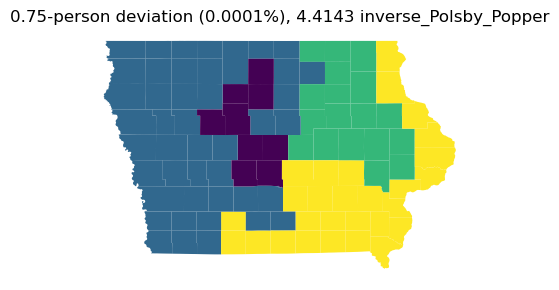

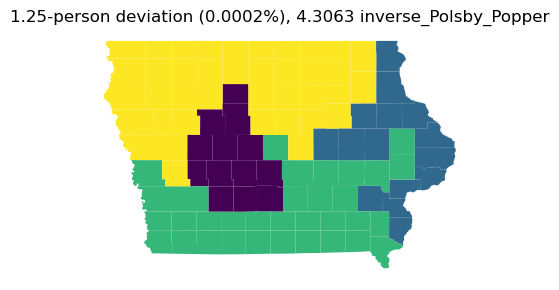

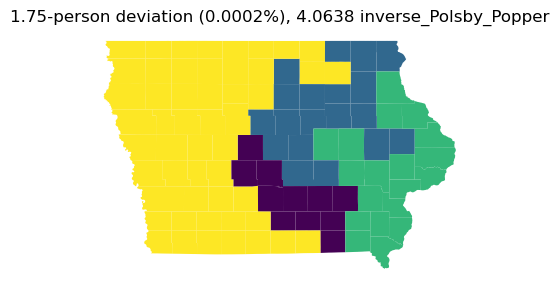

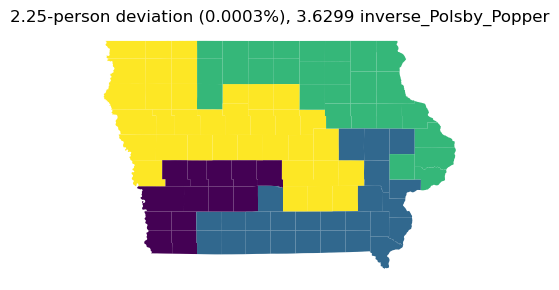

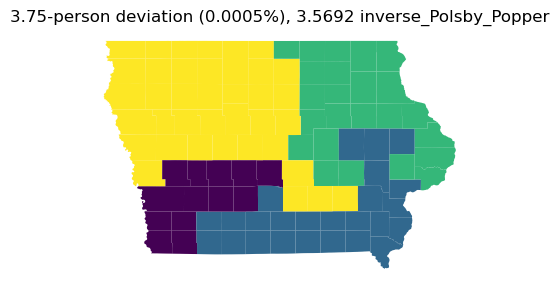

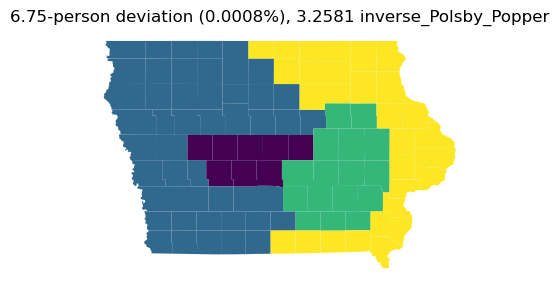

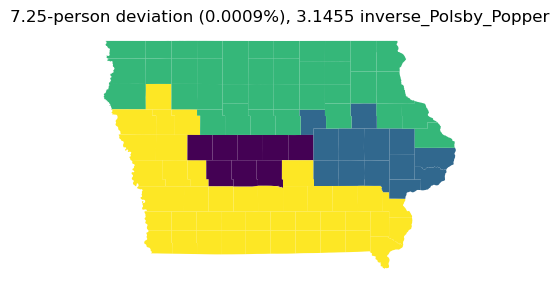

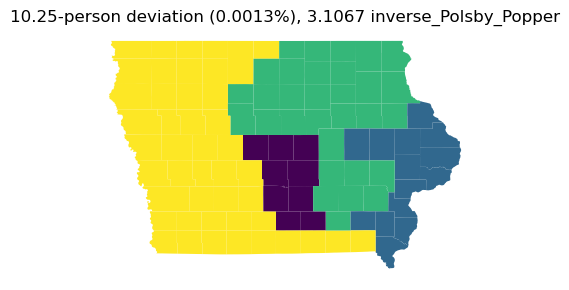

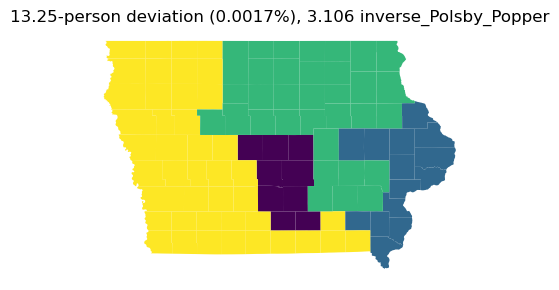

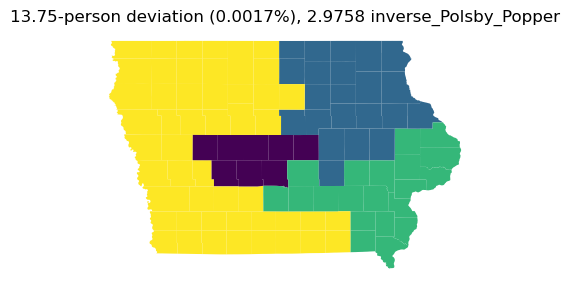

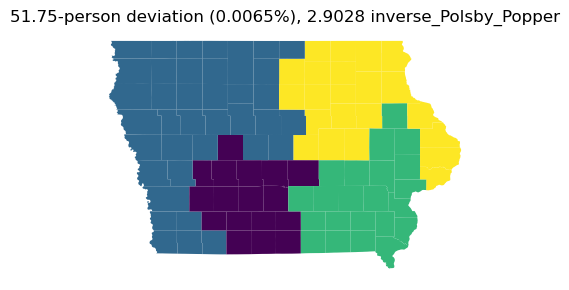

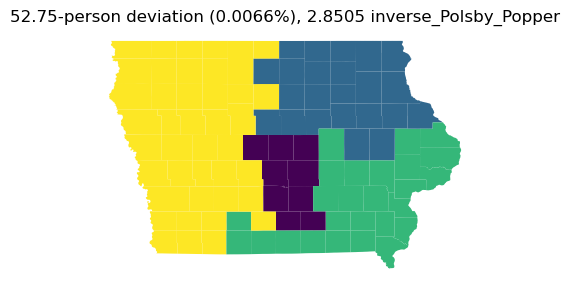

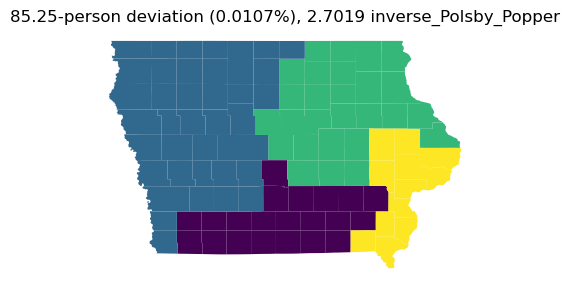

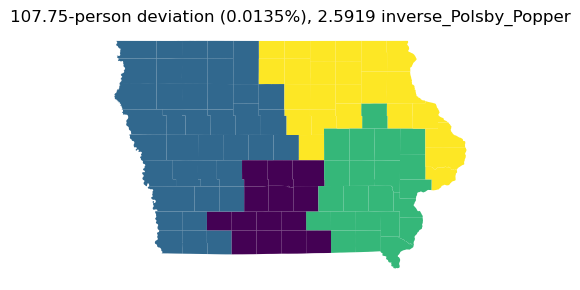

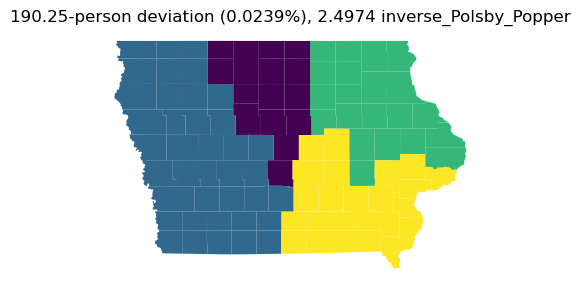

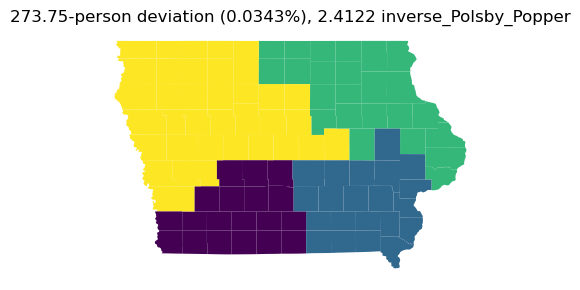

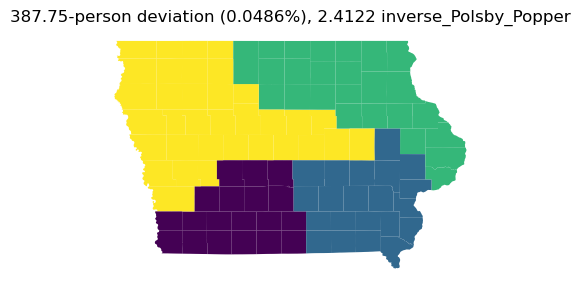

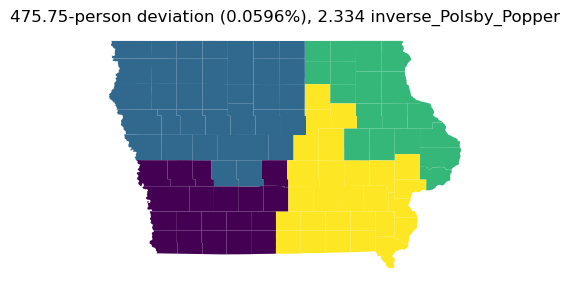

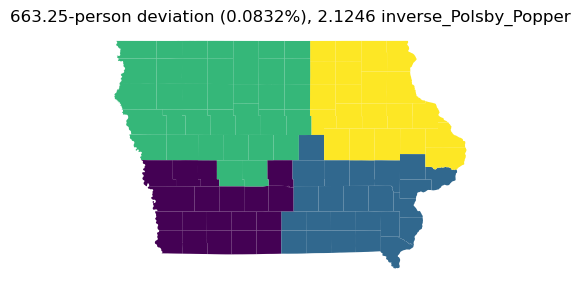

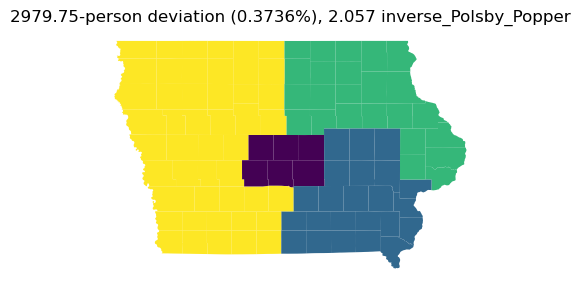

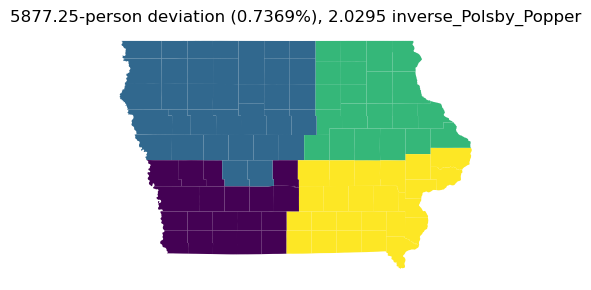

***************************************
obj_type = average_Polsby_Popper
***************************************
Pareto front objective values: [[0.75, 0.28260990033390976], [1.75, 0.28309150333432304], [2.25, 0.28692245249826376], [2.75, 0.2892856175267895], [3.75, 0.3130776371189198], [4.25, 0.3216719680492694], [4.75, 0.36523742034817036], [6.75, 0.38000851696127685], [17.75, 0.38728725637998523], [107.75, 0.4001265854623683], [190.25, 0.4039727456548957], [238.75, 0.41689454452027097], [269.25, 0.41860241644590857], [273.75, 0.4331505985521041], [387.75, 0.43465937887380873], [491.25, 0.43546922522442544], [546.25, 0.45458365582221316], [663.25, 0.47624911339613396], [1747.75, 0.479967127715462], [2015.25, 0.4846056112377325], [2343.25, 0.4941433245459359], [2979.75, 0.5041996195839638], [7762.75, 0.5064919713943423]]


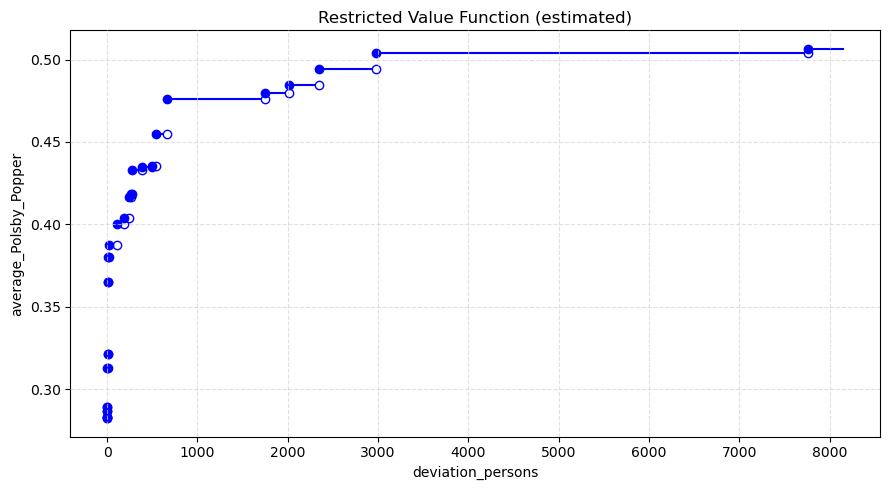

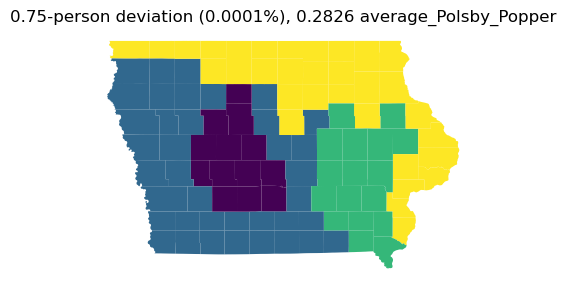

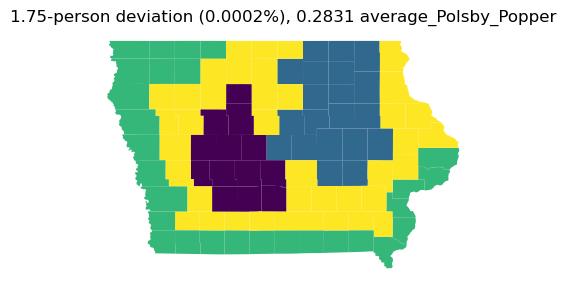

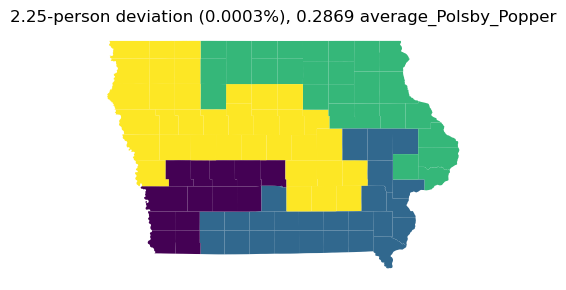

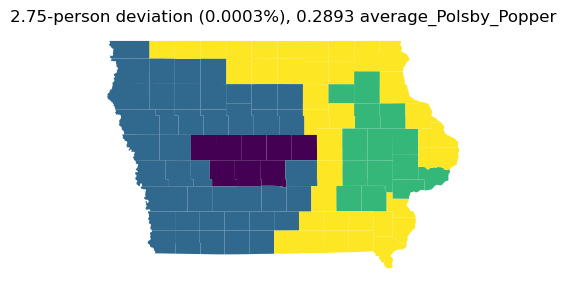

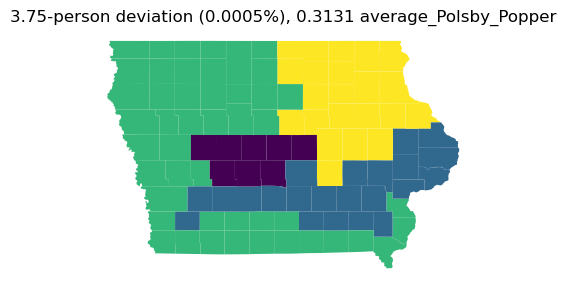

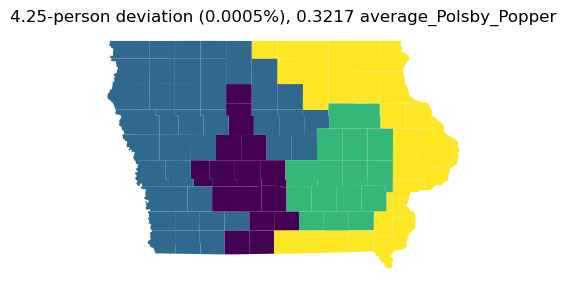

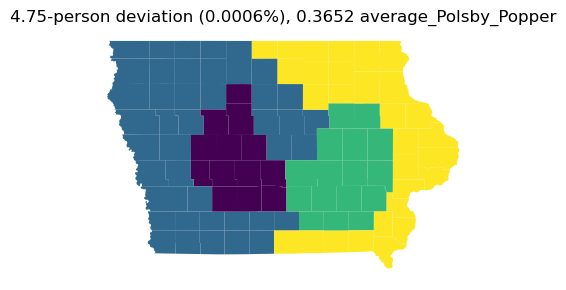

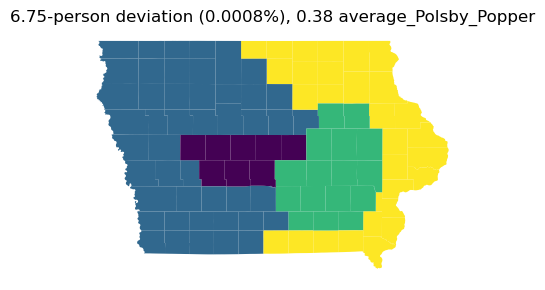

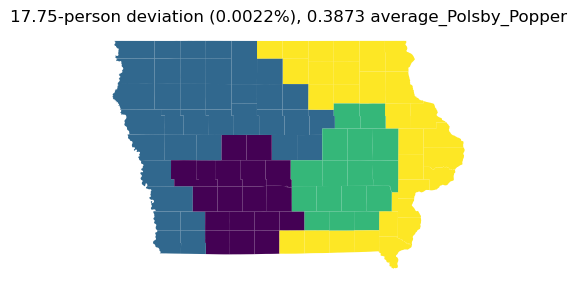

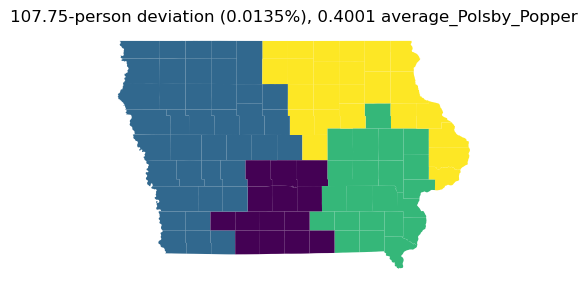

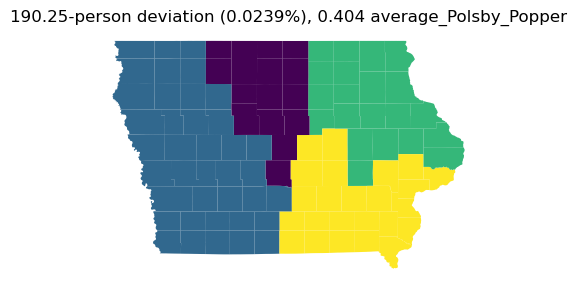

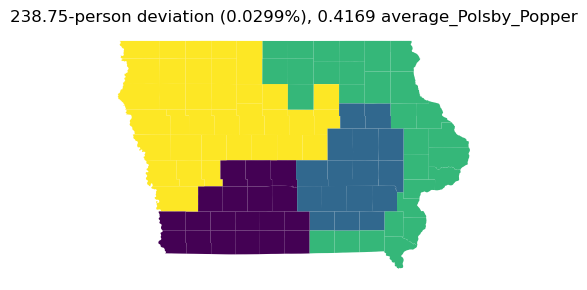

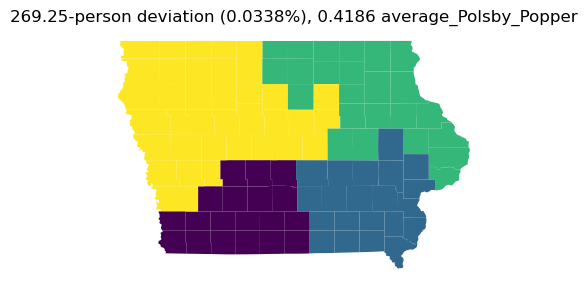

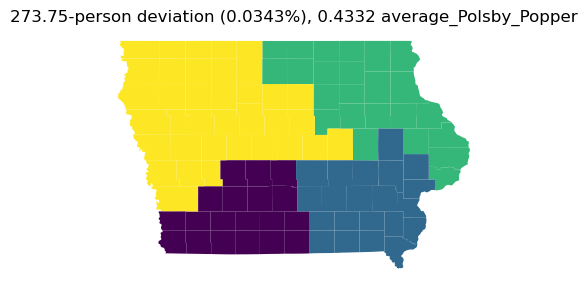

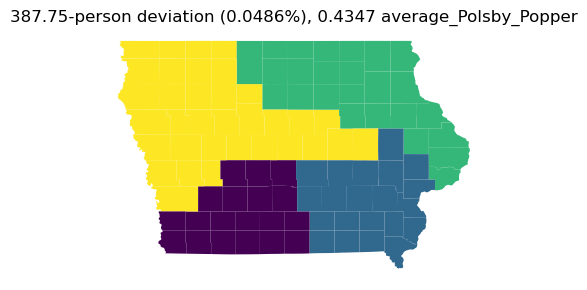

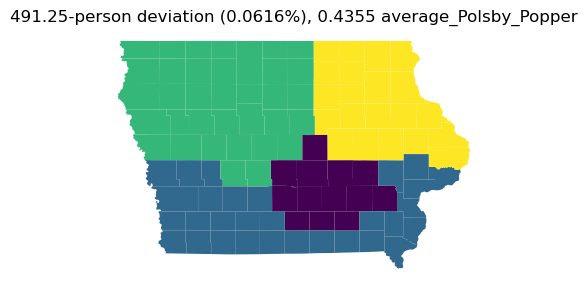

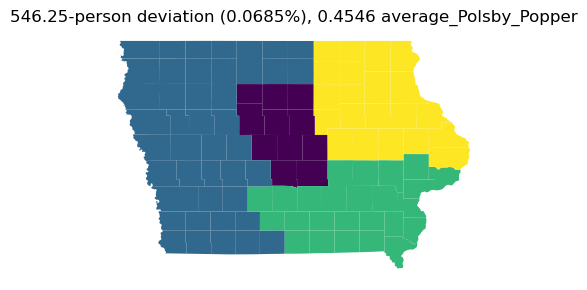

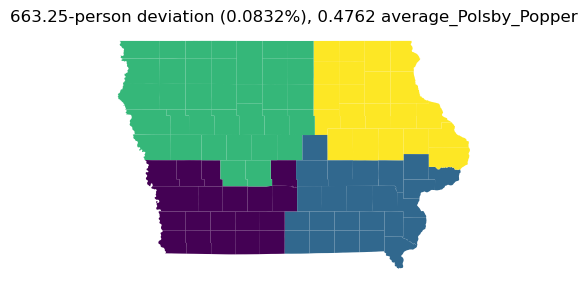

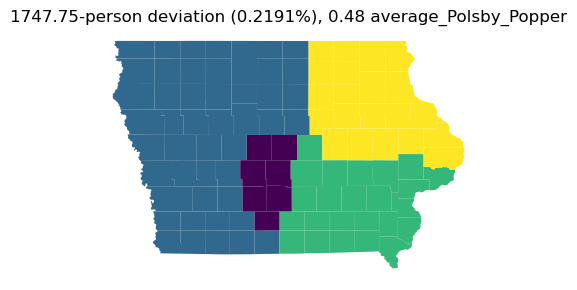

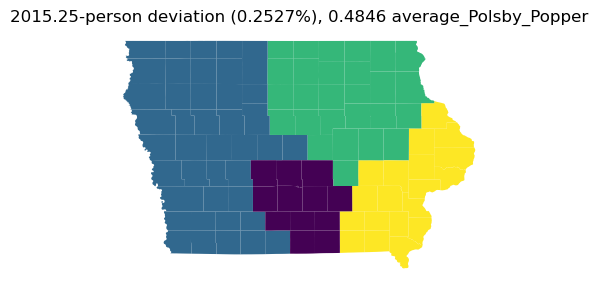

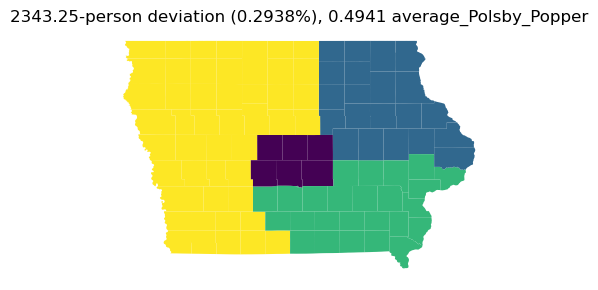

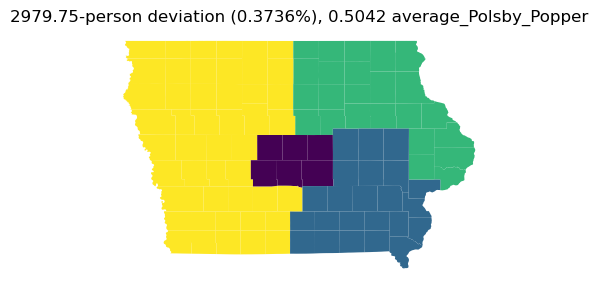

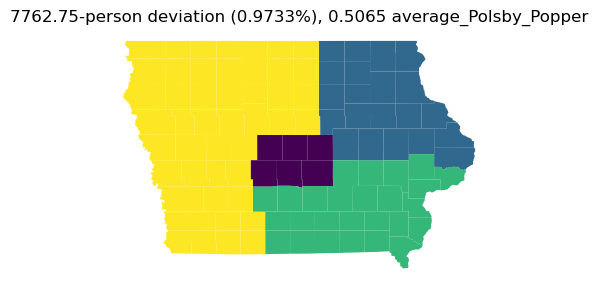

***************************************
obj_type = bottleneck_Polsby_Popper
***************************************
Pareto front objective values: [[0.75, 0.17572024636803688], [1.25, 0.1841025375085535], [1.25, 0.1841025375085535], [1.75, 0.20202069005510634], [2.25, 0.22156768070084865], [6.25, 0.22687139302002343], [6.75, 0.242828605236967], [7.25, 0.24440280814493506], [10.25, 0.2672201913321734], [23.75, 0.28212903199110284], [53.25, 0.28596150115613644], [62.25, 0.30065607783388143], [62.75, 0.3176839424703275], [85.25, 0.3201547573640306], [120.75, 0.3420228722122614], [160.25, 0.34287007358803884], [190.25, 0.35064169146911256], [190.25, 0.35064169146911256], [208.25, 0.3650603432503006], [281.75, 0.3661170584855246], [390.25, 0.3881268617126552], [475.75, 0.39298700374817713], [663.25, 0.41958457318242953], [3453.75, 0.42455373829990906], [3643.25, 0.4253350310040749], [5316.75, 0.43514401842144096]]


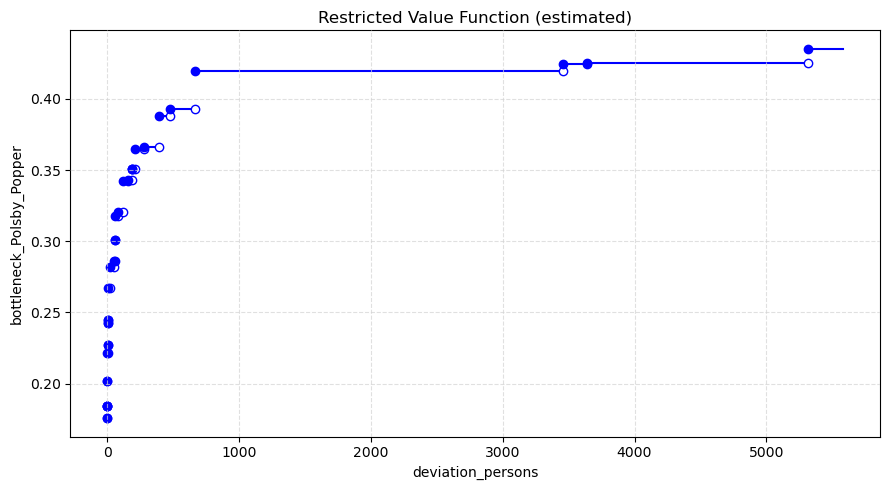

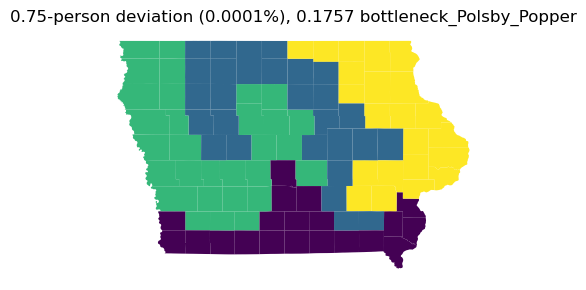

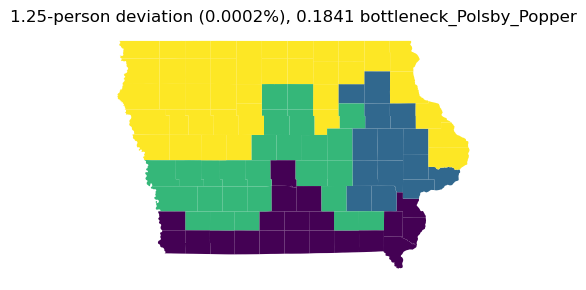

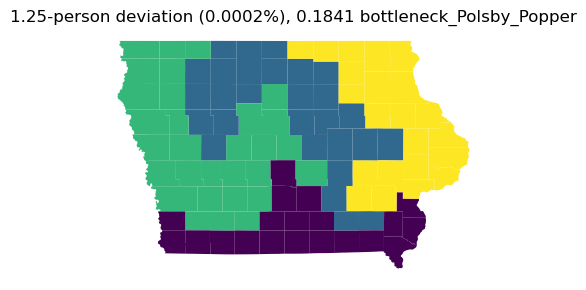

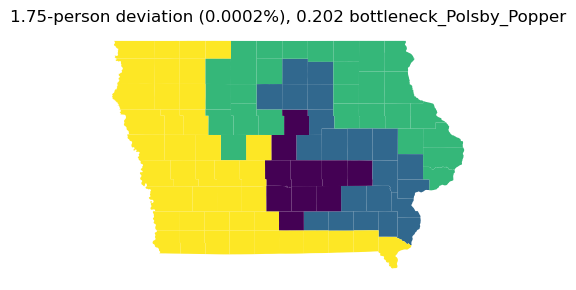

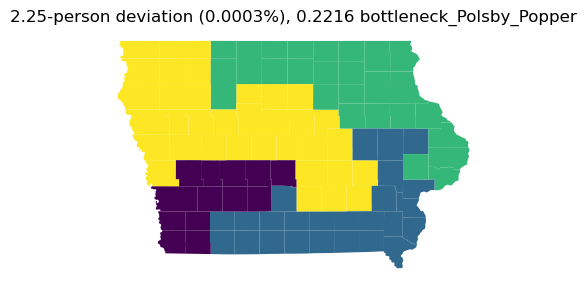

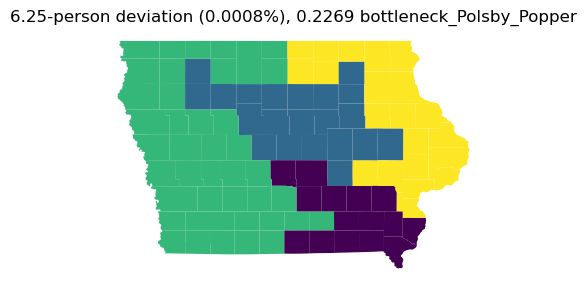

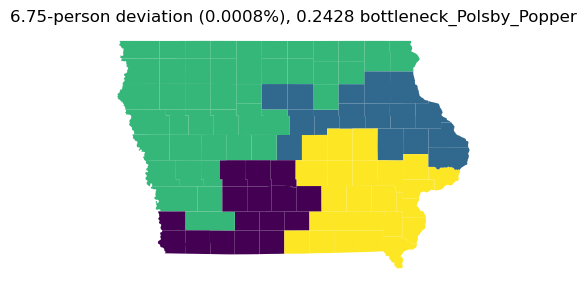

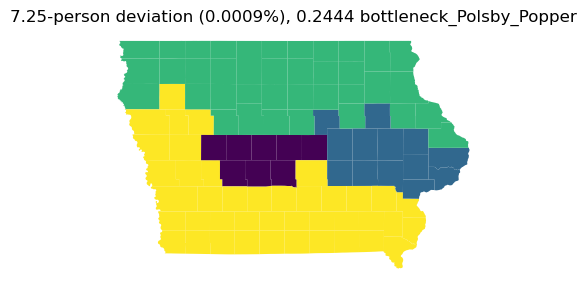

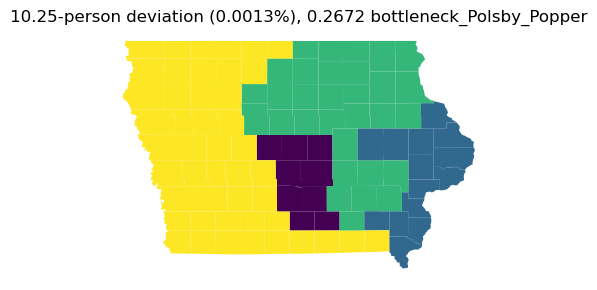

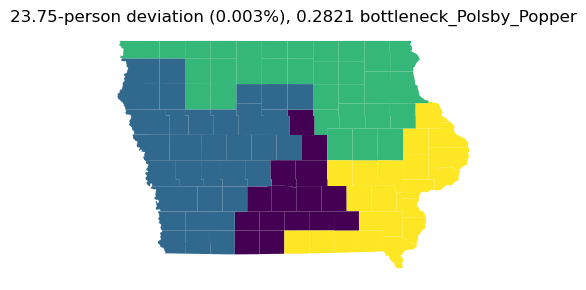

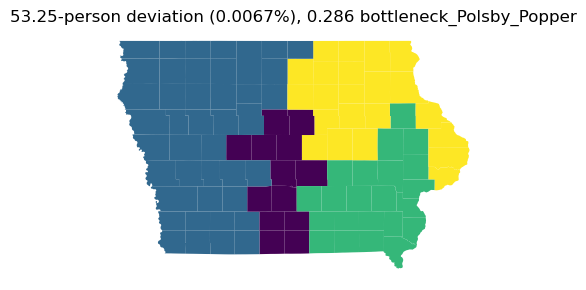

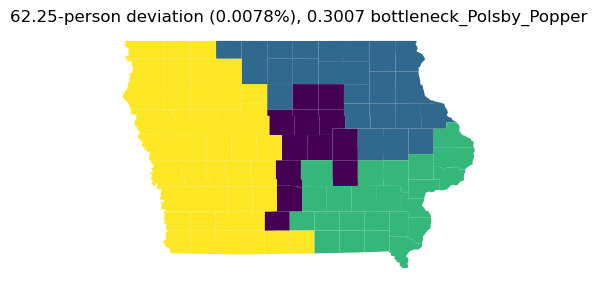

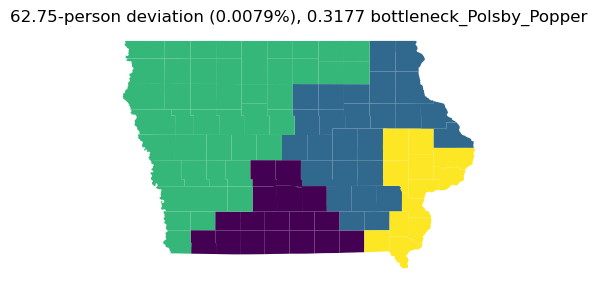

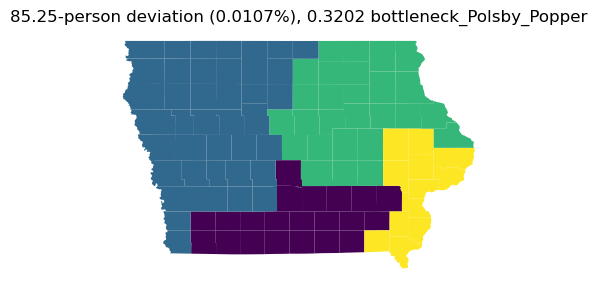

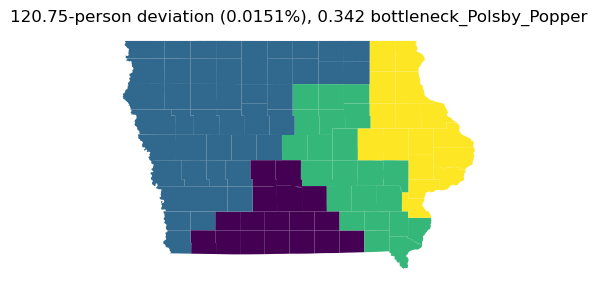

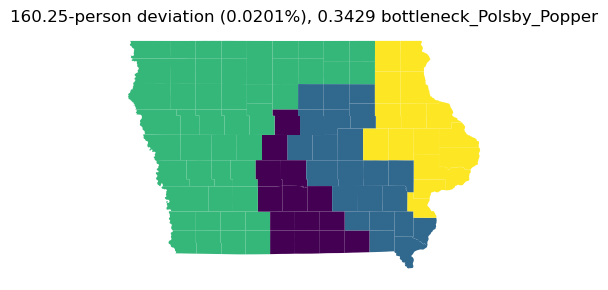

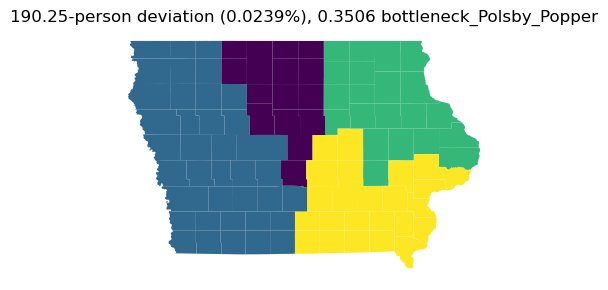

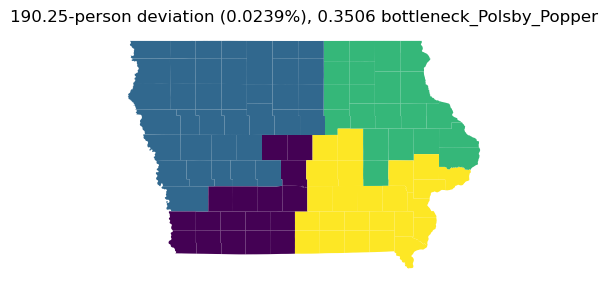

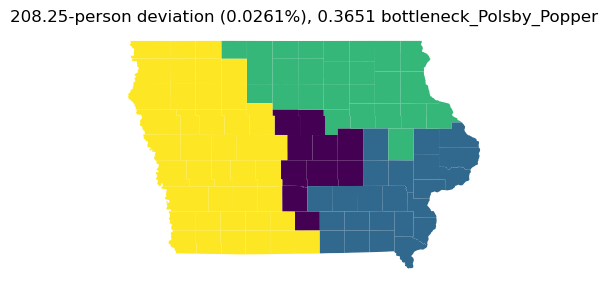

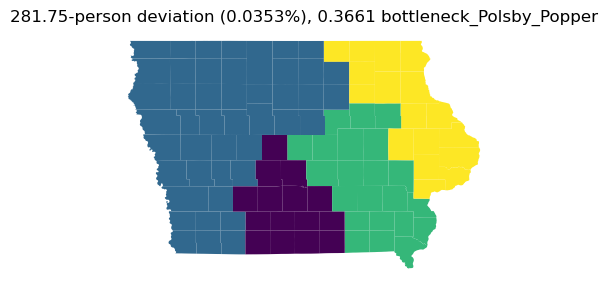

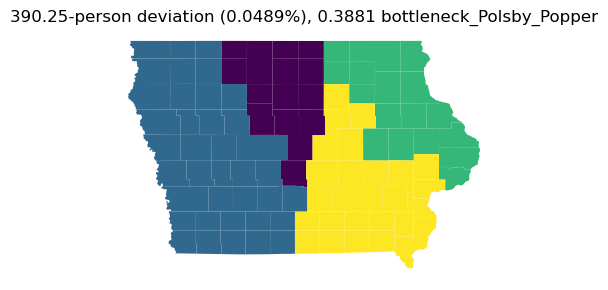

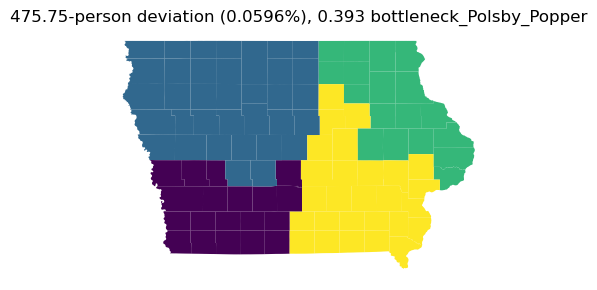

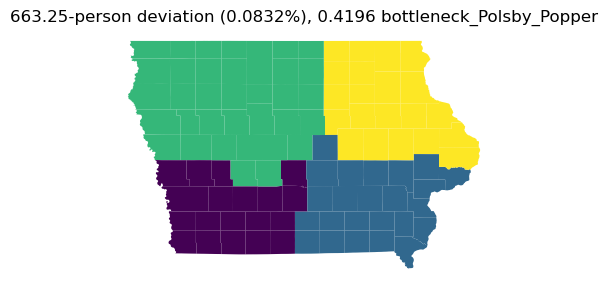

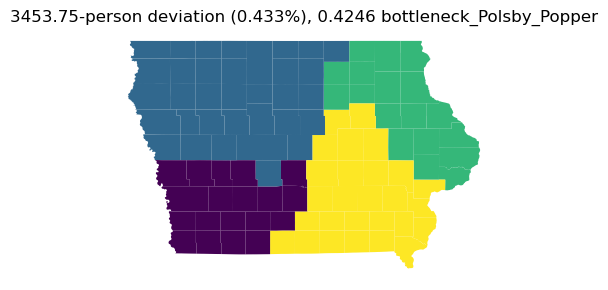

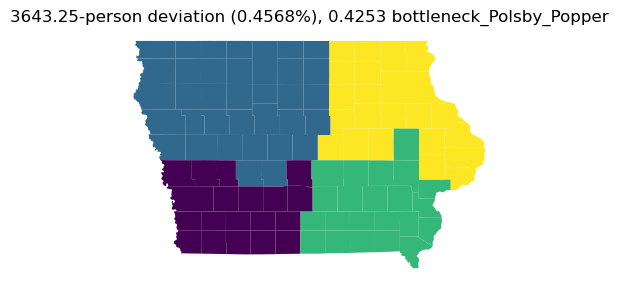

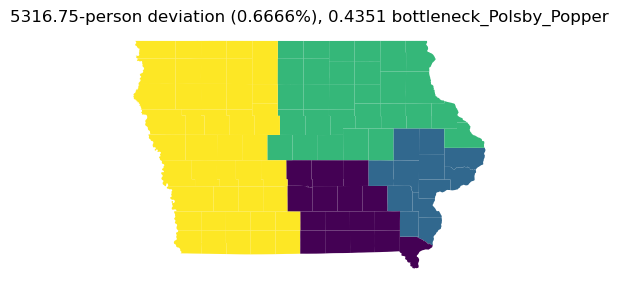

In [5]:
from pareto import ParetoFrontier
from metrics import *
from draw import draw_plan
filepath = 'C:\\districting-data-2020\\'
filename = state + '_county.shp'

# set dummy values... (because compute_obj checks plan feasibility...)
G._L = 0 
G._U = k * ideal_population
pareto = dict()

obj_types = ['cut_edges', 'perimeter', 'inverse_Polsby_Popper', 'average_Polsby_Popper', 'bottleneck_Polsby_Popper']

for obj_type in obj_types:

    print("***************************************")
    print("obj_type =", obj_type)
    print("***************************************")
    
    senses = ['min', 'max' if obj_type in ['average_Polsby_Popper', 'bottleneck_Polsby_Popper'] else 'min']
    obj_names = ['deviation_persons', obj_type]
    pareto[obj_type] = ParetoFrontier(senses, obj_names, state=state, level='county')
    
    for plan in plans:  
        dev = observed_deviation_persons(G, plan, ideal_population)
        obj = compute_obj(G, plan, obj_type)
        objval = [dev, obj]      
        
        # Add the plan and its objective values to the Pareto frontier
        pareto[obj_type].add_plan(plan, objval)
                
    # Print the Pareto frontier plans and objective values
    #print("Pareto front plans:", pareto[obj_type].plans)
    print("Pareto front objective values:", pareto[obj_type].objvals)
    
    # Set the limits accordingly
    pareto[obj_type].plot()   

    # Draw the plans from Pareto frontier
    pareto[obj_type].draw_plans()

In [6]:
print("plans =",plans)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [7]:
len(plans)

52451

In [8]:
for obj_type in obj_types:

    print("***************************************")
    print("obj_type =", obj_type)
    print("***************************************")
    
    senses = ['min', 'max' if obj_type in ['average_Polsby_Popper', 'bottleneck_Polsby_Popper'] else 'min']
    obj_names = ['deviation_persons', obj_type]
    pareto[obj_type] = ParetoFrontier(senses, obj_names, state=state, level='county')
    
    for plan in plans:  
        dev = observed_deviation_persons(G, plan, ideal_population)
        obj = compute_obj(G, plan, obj_type)
        objval = [dev, obj]      
        
        # Add the plan and its objective values to the Pareto frontier
        pareto[obj_type].add_plan(plan, objval)
                
    # Print the Pareto frontier plans and objective values
    print("Pareto front plans:", pareto[obj_type].plans)

***************************************
obj_type = cut_edges
***************************************
Pareto front plans: [[[0, 4, 8, 17, 43, 66, 73, 81, 93], [1, 9, 13, 14, 16, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42, 48, 49, 50, 52, 53, 55, 57, 58, 59, 62, 63, 64, 65, 68, 70, 74, 76, 78, 79, 84, 89, 91, 92], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [2, 3, 12, 18, 24, 25, 26, 28, 38, 39, 44, 46, 47, 54, 56, 60, 67, 71, 72, 82, 83, 86, 87, 90, 94, 95, 96, 97]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [4, 6, 7, 10, 15, 16, 18, 29, 34, 36, 49, 50, 51, 56, 69, 75, 77, 83, 88], [0, 1, 2, 5, 9, 13, 14, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 37, 40, 41, 42, 43, 52, 53, 55, 57, 58, 59, 60, 62, 63, 64, 65, 66, 68, 70, 71, 73, 74, 76, 79, 80, 81, 84, 86, 89, 91, 92, 96], [11, 24, 25, 26, 28, 39, 44, 45, 47, 54, 61, 67, 72, 82, 85, 87, 90, 97, 98]], [[4, 8, 17, 30, 32, 35, 37, 40, 43, 49, 52, 64, 66, 70, 73, 89], [1, 2, 9, 12, 14, 19,